In [1]:
import sys
sys.path.append("../../")
import numpy as np
import matplotlib.pyplot as plt
import scipy

from src.main.measures import ortho_rejection, ortho_projection, cosine_similiarity, between_a, between_b

In [2]:
def show_vectors(vectors, vectors_with_start, figsize=(12, 12)):
    """https://stackoverflow.com/a/42282532/5122790"""
    fig, ax = plt.subplots(figsize=figsize)
    HEAD_SIZE = 0.2
    M = np.array(vectors)
    colors = ['r','g','b','k','gray']
    for i,l in enumerate(range(0,M.shape[0])):
        ax.arrow(0,0,M[i,0],M[i,1],head_width=HEAD_SIZE,head_length=HEAD_SIZE,color = colors[i], length_includes_head=True)

    colors = ['c','m','y']
    for i,(xs,ys,xf,yf) in enumerate([(*i[0],*i[1]) for i in vectors_with_start]):
        ax.arrow(xs,ys,xf,yf,head_width=HEAD_SIZE,head_length=HEAD_SIZE,color = colors[i], length_includes_head=True)

    maxes = 1.1*np.amax(np.vstack(((np.amax(abs(np.array([sum(i) for i in vectors_with_start])),axis=0) if vectors_with_start else np.array((0,0))),np.amax(abs(M), axis = 0))), axis=0)
    plt.plot(0,0,'ok') #plot a black point at the origin
    plt.xlim([-maxes[0],maxes[0]])
    plt.ylim([-maxes[1],maxes[1]])
    ax.set_aspect('equal', 'box')
    plt.grid(b=True, which='major')
    plt.show()

Projection of Vector u on Vector v is:  [1.39344262 1.67213115]


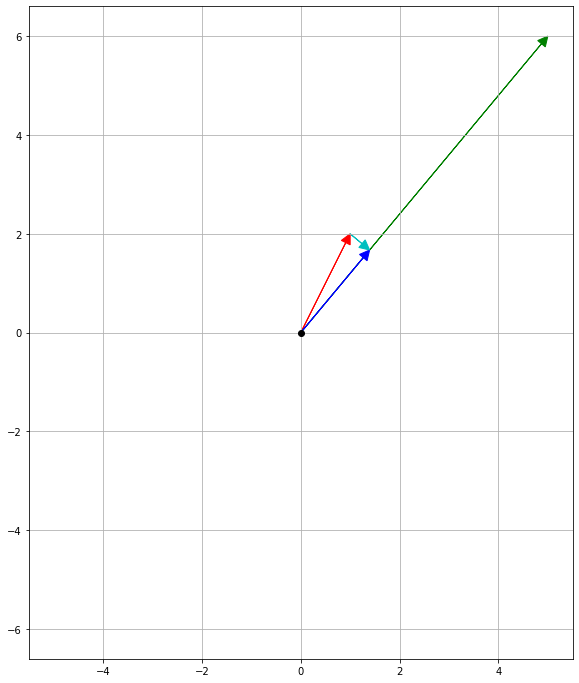

In [3]:
#from https://www.geeksforgeeks.org/vector-projection-using-python/

u = np.array([1, 2])
v = np.array([5, 6])
  
# Task: Project vector u on vector v
  
# finding norm of the vector v
v_norm = np.sqrt(sum(v**2))    
  
# Apply the formula as mentioned above
# for projecting a vector onto another vector
# find dot product using np.dot()
proj_of_u_on_v = (np.dot(u, v)/v_norm**2)*v
  
print("Projection of Vector u on Vector v is: ", proj_of_u_on_v)

vectors = [u,v,proj_of_u_on_v]
vectors_with_start = [(u, proj_of_u_on_v-u)]

show_vectors(vectors, vectors_with_start)

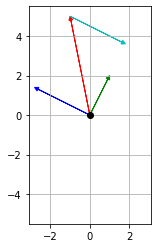

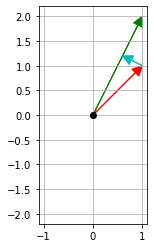

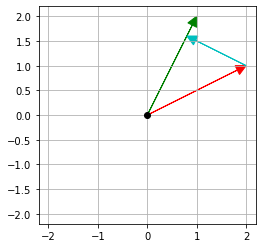

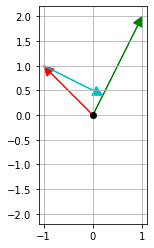

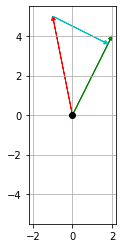

[ 4. -4.]


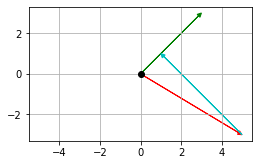

In [6]:
def ortho_proj(a,b):
    #https://en.wikipedia.org/wiki/Vector_projection
    a1_sc = np.dot(a,(b/np.linalg.norm(b)))
    b_hat = b/np.linalg.norm(b)
    a1 = a1_sc*b_hat
    a2 = a-a1
    return a2

a = np.array([-1,5])
b = np.array([1,2])
proj = ortho_proj(a,b)
show_vectors([a,b,proj],[(a,proj*-1)], figsize=(4,4))
#red is a, green is b, blue SHOULD BE the projection from b on a

a = np.array([1,1])
b = np.array([1,2])
proj = ortho_proj(a,b)
show_vectors([a,b],[(a,proj*-1)], figsize=(4,4))
#red is a, green is b, cyan the projection from a onto b.

a = np.array([2,1])
b = np.array([1,2])
proj = ortho_proj(a,b)
show_vectors([a,b],[(a,proj*-1)], figsize=(4,4))
#red is a, green is b, cyan the projection from a onto b

a = np.array([-1,1])
b = np.array([1,2])
proj = ortho_proj(a,b)
show_vectors([a,b],[(a,proj*-1)], figsize=(4,4))
#red is a, green is b, cyan the projection from a onto b

a = np.array([-1,5])
b = np.array([1,2])*2
proj = ortho_proj(a,b)
show_vectors([a,b],[(a,proj*-1)], figsize=(4,4))
#red is a, green is b, cyan the projection from a onto b

a = np.array([5,-3])
b = np.array([3,3])
proj = ortho_proj(a,b)
print(proj)
show_vectors([a,b],[(a,proj*-1)], figsize=(4,4))
#red is a, green is b, cyan the projection from a onto b

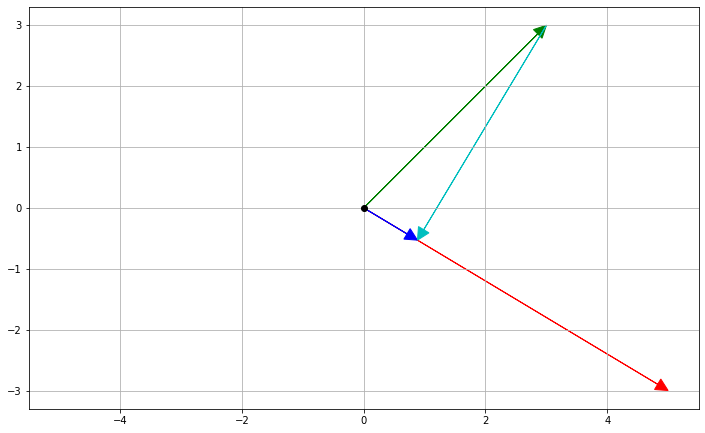

In [12]:
def ortho_rejection_affine(first, second, candidate):
    """https://en.wikipedia.org/wiki/Vector_projection"""
    b = second-first
    a = candidate
    a1_sc = np.dot(a,(b/np.linalg.norm(b)))
    b_hat = b/np.linalg.norm(b)
    a1 = a1_sc*b_hat
    a2 = a-a1
    return a2*-1

def ortho_projection_affine(first, second, candidate):
    """https://en.wikipedia.org/wiki/Vector_projection"""
    b = second-first
    a = candidate
    a1_sc = np.dot(a,(b/np.linalg.norm(b)))
    b_hat = b/np.linalg.norm(b)
    a1 = a1_sc*b_hat
    return a1

first,second,third = np.array([3,5]), np.array([8,2]), np.array([3,3])
rej = ortho_rejection_affine(first, second, third)
proj = ortho_projection_affine(first, second, third)
show_vectors([second-first,third,proj],[(third,rej),])

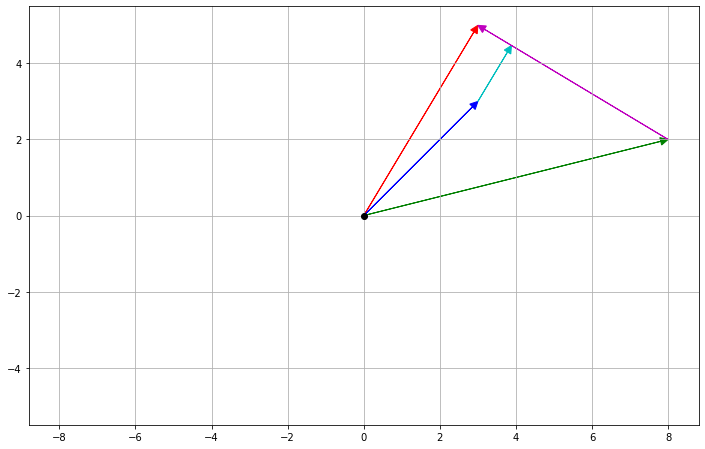

In [11]:
first,second,third = np.array([3,5]), np.array([8,2]), np.array([3,3])
rej = ortho_rejection(first-second, third-second)
proj = ortho_projection(first-second, third-second)
show_vectors([first,second,third],[(third,rej),(second,first-second)])

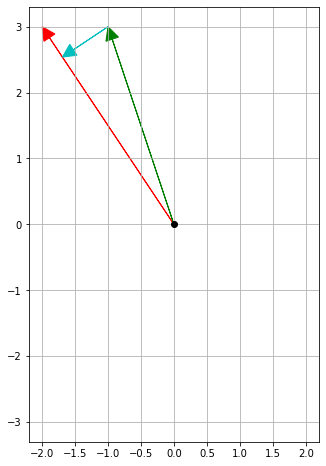

In [13]:
first,second,third = np.array([-1,5]), np.array([1,2]), np.array([-1,3])
rej = ortho_rejection_affine(first, second, third)
show_vectors([first-second, third],[(third,rej)], figsize=(8,8))
#proj = ortho_projection(first, second, third)
#print(f"np.array([{round(rej[0],5)}, {round(rej[1],5)}]), np.array([{round(proj[0],5)}, {round(proj[1],5)}])")

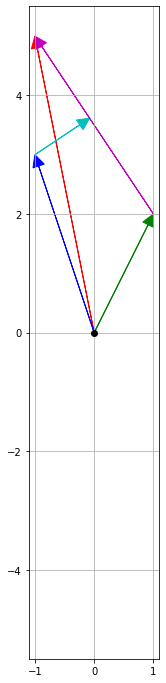

In [14]:
first,second,third = np.array([-1,5]), np.array([1,2]), np.array([-1,3])
rej = ortho_rejection(first-second, third-second)
show_vectors([first,second,third],[(third,rej),(second,first-second)])

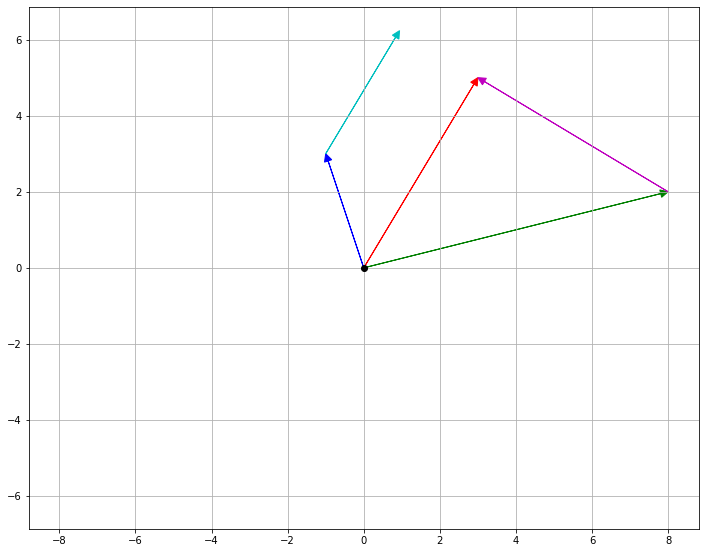

In [15]:
first,second,third = np.array([3,5]), np.array([8,2]), np.array([-1,3])
rej = ortho_rejection(first-second, third-second)
show_vectors([first,second,third],[(third,rej),(second,first-second)])

0.9999999999999998
0.9999999999999998


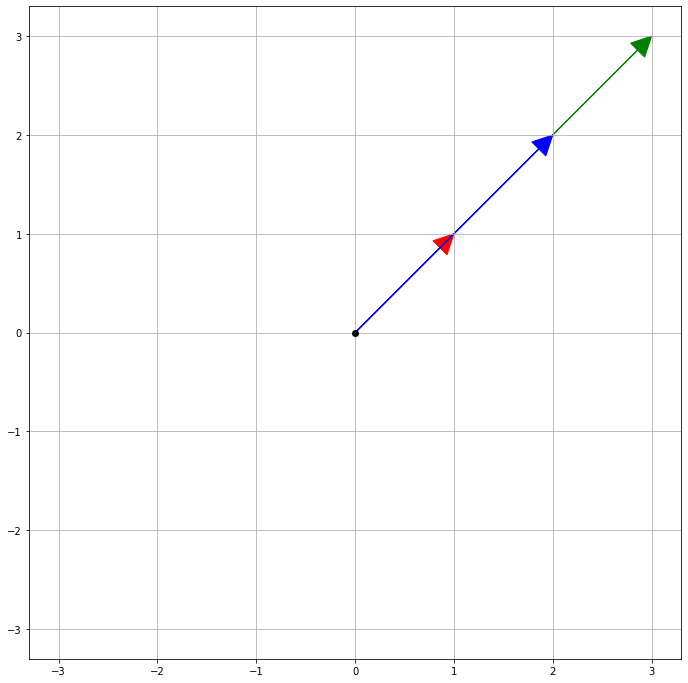

In [16]:
first = np.array([1,1])
second = np.array([3,3])
third = np.array([2,2])

vectors = [first,second,third]

print(cosine_similiarity(third-first,second-first))
print(cosine_similiarity(first-third,third-second))

show_vectors(vectors, [])

#TODO die puren cosine-similarities sind doch auch schon ne super similarity measure?
#Section 4.1 of [DESC15] says: Geometrically, we say that the point pb is between points pa and pc if cos(p_ap_b,p_bp_c)= 1, that I can confirm here.

1.5700924586837752e-16
1.0000000000000002


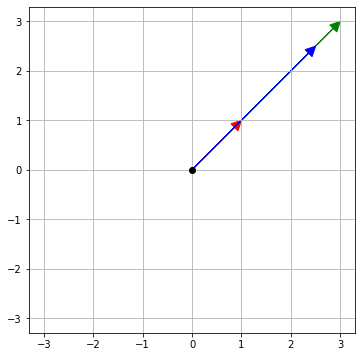

3.1401849173675503e-16
1.0


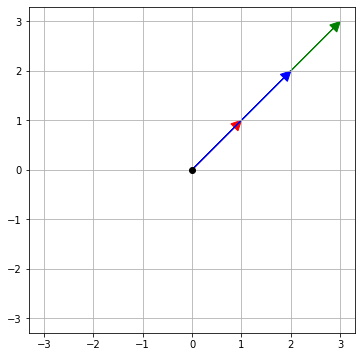

0.07071067811865482
0.9982154409274651


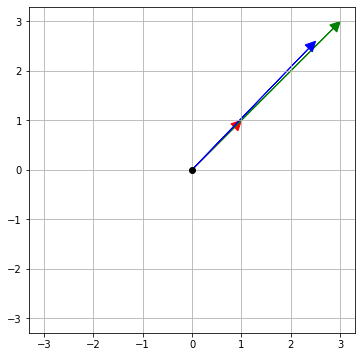

0.7071067811865476
0.8740320488976422


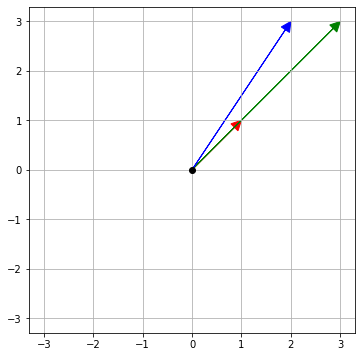

inf
0.5000000000000001


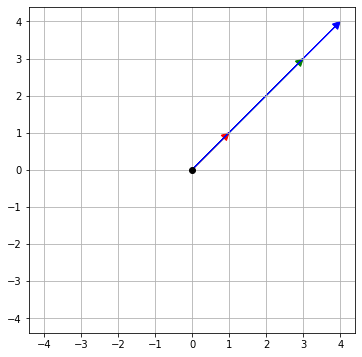

inf
0.4370160244488211


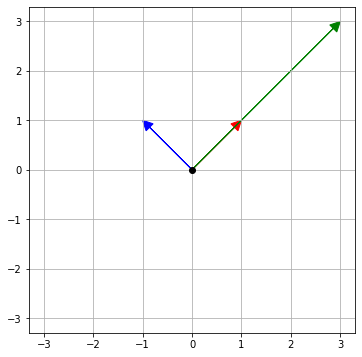

1.4849242404917498
0.7149594617992994


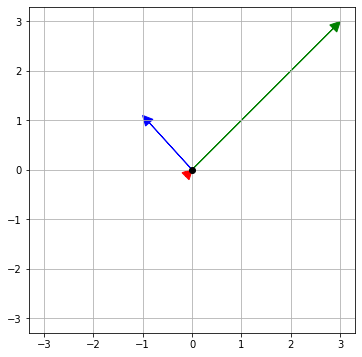

inf
0.718348060271866


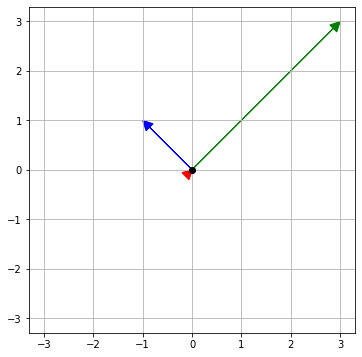

In [17]:
first,second,third = np.array([1,1]), np.array([3,3]), np.array([2.5,2.5])
print(between_a(first,second,third)) #should be zero if b is perfectly between a and c.
print(between_b(first,second,third)) #should be 1 if b is perfectly between a and c.
show_vectors([first,second,third], [], figsize=(6,6))

first,second,third = np.array([1,1]), np.array([3,3]), np.array([2,2])
print(between_a(first,second,third)) #should be zero if b is perfectly between a and c.
print(between_b(first,second,third)) #should be 1 if b is perfectly between a and c.
show_vectors([first,second,third], [], figsize=(6,6))

first,second,third = np.array([1,1]), np.array([3,3]), np.array([2.5,2.6])
print(between_a(first,second,third)) #should be zero if b is perfectly between a and c.
print(between_b(first,second,third)) #should be 1 if b is perfectly between a and c.
show_vectors([first,second,third], [], figsize=(6,6))

first,second,third = np.array([1,1]), np.array([3,3]), np.array([2,3])
print(between_a(first,second,third)) #should be zero if b is perfectly between a and c.
print(between_b(first,second,third)) #should be 1 if b is perfectly between a and c.
show_vectors([first,second,third], [], figsize=(6,6))

first,second,third = np.array([1,1]), np.array([3,3]), np.array([4,4])
print(between_a(first,second,third)) #should be zero if b is perfectly between a and c.
print(between_b(first,second,third)) #should be 1 if b is perfectly between a and c.
show_vectors([first,second,third], [], figsize=(6,6))

first,second,third = np.array([1,1]), np.array([3,3]), np.array([-1,1])
print(between_a(first,second,third)) #should be zero if b is perfectly between a and c.
print(between_b(first,second,third)) #should be 1 if b is perfectly between a and c.
show_vectors([first,second,third], [], figsize=(6,6))

first,second,third = np.array([0.01,0.01]), np.array([3,3]), np.array([-1,1.1])
print(between_a(first,second,third)) #should be zero if b is perfectly between a and c.
print(between_b(first,second,third)) #should be 1 if b is perfectly between a and c.
show_vectors([first,second,third], [], figsize=(6,6))

first,second,third = np.array([0.01,0.01]), np.array([3,3]), np.array([-1,1])
print(between_a(first,second,third)) #should be zero if b is perfectly between a and c.
print(between_b(first,second,third)) #should be 1 if b is perfectly between a and c.
show_vectors([first,second,third], [], figsize=(6,6))

inf
0.39852101320086


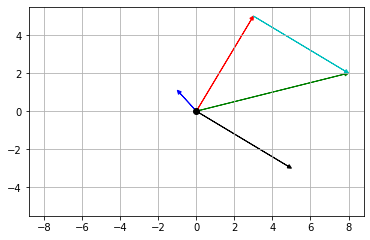

1.7149858514250889
0.821374259315746


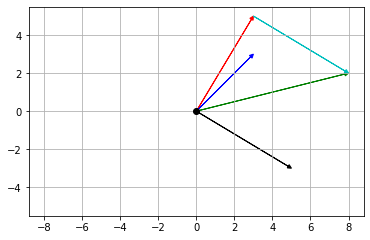

In [21]:
first,second,third = np.array([3,5]), np.array([8,2]), np.array([-1,1.1])
print(between_a(first,second,third)) #should be zero if b is perfectly between a and c.
print(between_b(first,second,third)) #should be 1 if b is perfectly between a and c.
show_vectors([first,second,third, second-first], [(first,second-first)], figsize=(6,6))

first,second,third = np.array([3,5]), np.array([8,2]), np.array([3,3])
print(between_a(first,second,third)) #should be zero if b is perfectly between a and c.
print(between_b(first,second,third)) #should be 1 if b is perfectly between a and c.
show_vectors([first,second,third, second-first], [(first,second-first)], figsize=(6,6))

1.7149858514250889


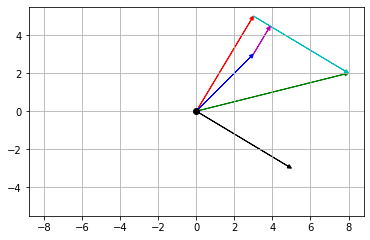

5.144957554275266


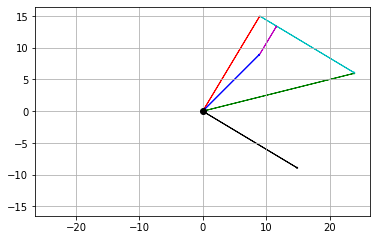

In [27]:
first,second,third = np.array([3,5]), np.array([8,2]), np.array([3,3])
projection = ortho_rejection(first-second, third-second)
print(between_a(first,second,third)) #should be zero if b is perfectly between a and c.
show_vectors([first,second,third,second-first], [(first,second-first),(third,projection)], figsize=(6,6))

first,second,third = np.array([3,5])*3, np.array([8,2])*3, np.array([3,3])*3
projection = ortho_rejection(first-second, third-second)
print(between_a(first,second,third)) #should be zero if b is perfectly between a and c.
show_vectors([first,second,third,second-first], [(first,second-first),(third,projection)], figsize=(6,6))

In [12]:
#TODO as soon as everything works, write tests! first geometrically, but also confirming Table 1 from [DESC15]!
#TODO this should become higher quicker, I mean in the last example the candidate is pretty far away from the others.

0.0


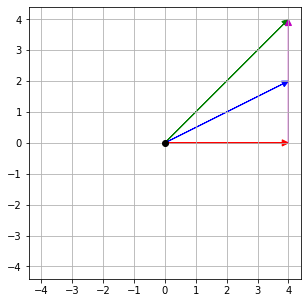

0.0


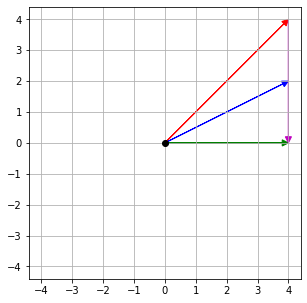

8.0


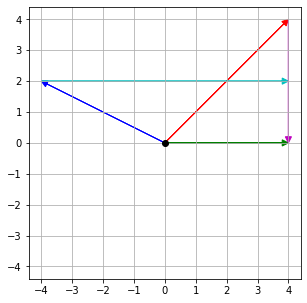

4.0


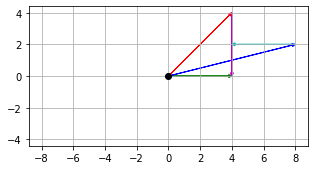

In [33]:
first,second,third = np.array([4, 0]), np.array([4,4]), np.array([4,2])
rej = ortho_rejection(first-second, third-second)
print(between_a(first,second,third)) #should be zero if b is perfectly between a and c.
show_vectors([first, second, third], [(third,rej), (first, second-first)], figsize=(5,5))

first,second,third = np.array([4, 4]), np.array([4,0]), np.array([4,2])
rej = ortho_rejection(first-second, third-second)
print(between_a(first,second,third)) #should be zero if b is perfectly between a and c.
show_vectors([first, second, third], [(third,rej), (first, second-first)], figsize=(5,5))

first,second,third = np.array([4, 4]), np.array([4,0]), np.array([-4,2])
rej = ortho_rejection(first-second, third-second)
print(between_a(first,second,third)) #should be zero if b is perfectly between a and c.
show_vectors([first, second, third], [(third,rej), (first, second-first)], figsize=(5,5))

first,second,third = np.array([4, 4]), np.array([4,0]), np.array([8,2])
rej = ortho_rejection(first-second, third-second)
print(between_a(first,second,third)) #should be zero if b is perfectly between a and c.
show_vectors([first, second, third], [(third,rej), (first, second-first)], figsize=(5,5))